<a href="https://colab.research.google.com/github/myielin/dataMiningUTFPR/blob/master/spaceTitanic/spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### passos iniciais
[Github](https://github.com/myielin/dataMiningUTFPR/blob/master/spaceTitanic/test.csv)

In [46]:
import pandas as pd
from matplotlib import pyplot as plt

In [47]:
test = pd.read_csv("https://raw.githubusercontent.com/myielin/dataMiningUTFPR/master/spaceTitanic/test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/myielin/dataMiningUTFPR/master/spaceTitanic/train.csv")

# Pré-processamento

Para exploração dos dados em geral será utilizada, principalmente, a base de treino <br><br> (a exploração utilizando métodos gráficos está inserida na seção de visualização, mais abaixo)

In [48]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [49]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [50]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

In [51]:
# retirando as colunas que não serão utilizadas

train.drop(["PassengerId", "Name"], axis=1, inplace=True)
test.drop(["PassengerId", "Name"], axis=1, inplace=True)

#### Preenchimento de dados
A coluna com menor desvio padrão é a idade, então a forma de imputação de informações seguirá a média

In [52]:
train["Age"].fillna(train["Age"].mean(), inplace=True)
test["Age"].fillna(test["Age"].mean(), inplace=True)

Nos atributos referentes aos gastos dos passageiros, os dados utilizados para substituição dos valores nulos serão baseados na mediana 

In [53]:
for i in train.columns[6:11]:        # colunas referentes aos valores gastos
  train[i].fillna(train[i].median(), inplace=True)
  test[i].fillna(test[i].median(), inplace=True)

In [54]:
# checando..
print(train.isna().sum())

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64


Alguns demais valores categóricos serão completados por meio de outros métodos

In [55]:
print(train["Cabin"].value_counts())

train["Cabin"].fillna(method = "bfill", inplace=True)
test["Cabin"].fillna(method = "bfill", inplace=True)

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


In [56]:
print(train["Destination"].value_counts())

train["Destination"].fillna(train["Destination"].mode(), inplace=True)
test["Destination"].fillna(test["Destination"].mode(), inplace=True)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [57]:
print(train["VIP"].value_counts())

train["VIP"].fillna(False, inplace=True)
test["VIP"].fillna(False, inplace=True)

False    8291
True      199
Name: VIP, dtype: int64


Os valores nulos restantes, referentes às duas primeiras colunas, serão retirados da base de dados.

In [58]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [59]:
train.isna().any()

HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Transported     False
dtype: bool

### transformação de dados categóricos em numéricos

Dada a quantidade relativamente pequena de atributos das seguintes colunas, os valores serão substituídos utilizando o método oneHotEncoder

In [60]:
from sklearn.preprocessing import OneHotEncoder
from numpy import array 

In [61]:
# função para aplicação do método em ambos conjuntos de teste e de treino

def encode(df, column):
  ohe = OneHotEncoder()
  hp = ohe.fit_transform(df[[column]]).toarray()

  names = ohe.categories_
  names = array(names).ravel()
  new = pd.DataFrame(hp, columns = names)

  df.drop(column, axis=1, inplace=True)
  return pd.concat([df, new], axis = 1)

Como a função retorna um dataframe já com as novas colunas concatenadas, resta somente aplicar a mudança nas bases de dados e dropar as colunas originais

In [62]:
test = encode(test, "HomePlanet")
test = encode(test, "Destination")

In [63]:
train = encode(train, "HomePlanet")
train = encode(train, "Destination")

In [64]:
# célula de correção pois é gerada uma coluna nan

test.drop(test.columns[-1], axis=1, inplace=True)
train.drop(train.columns[-1], axis=1, inplace=True)

In [65]:
train.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,0.0,0.0,1.0
1,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0,0.0,0.0,1.0
2,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0,0.0,0.0,1.0
3,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0,0.0,0.0,1.0
4,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0,0.0,0.0,1.0


In [66]:
test.head()

# os valores de HomePlanet e Destination se tornaram as últimas colunas:

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,0.0,0.0,1.0
4,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Conversão de valores booleanos:

In [67]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [68]:
le = LabelEncoder()
for i in ["CryoSleep", "VIP"]:
  train[i] = le.fit_transform(train[i])
  test[i] = le.fit_transform(test[i])

train["Transported"] = le.fit_transform(train["Transported"])

In [69]:
train.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,0.0,0.0,1.0
2,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0


Cabines serão classificadas com base na quantidade de hóspedes que possuem
(ou seja, se um hóspede está sozinho na cabine, o valor será 1, se compartilha a cabine com 2 pessoas, o valor será 3, etc)

In [70]:
train["Cabin"].value_counts()

G/734/S     8
F/1808/P    7
B/82/S      7
G/657/P     7
C/137/S     7
           ..
G/564/P     1
G/562/P     1
C/114/P     1
F/706/P     1
C/175/S     1
Name: Cabin, Length: 6196, dtype: int64

In [71]:
def cabines(df, nomes):
  vals = {}

  for n in (nomes):
    vals[n] = (df["Cabin"] == n).sum()

  return vals  

In [72]:
cabs = train["Cabin"].unique()
train["Cabin"].replace(cabines(train, cabs), inplace=True)

In [73]:
cabs = test["Cabin"].unique()
test["Cabin"].replace(cabines(test, cabs), inplace=True)

Rodando value_counts (célula acima) novamente é possível checar que os valores foram corretamente alterados

In [74]:
test.head()
# todos os valores foram transformados em numéricos:

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,1,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,1,19.0,0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,1,38.0,0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,1,20.0,0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Modelos preditivos

In [75]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import (accuracy_score, precision_score, f1_score)
from numpy import mean, std

In [76]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [77]:
x_train = train.drop("Transported", axis = 1).values
y_train = train["Transported"].values


# x_test would be the test dataset
y_test = pd.read_csv("https://raw.githubusercontent.com/myielin/dataMiningUTFPR/master/spaceTitanic/sample_submission.csv")

Como alguns valores foram retirados do conjunto teste, os conjunto de respostas também deve ser reduzido. Uma vez que todas as respostas são False, quaisquer linhas podem ser retiradas sem afetar a acuracidade

In [78]:
print(y_test.shape)    # y
print(test.shape)      # x

(4277, 2)
(3764, 15)


In [79]:
# igualando o número de linhas
y_test = y_test[0:3764]

# retirando a coluna de IDs
y_test.drop("PassengerId", axis=1, inplace=True)

# tornando os valores numéricos
y_test["Transported"] = y_test["Transported"].apply(lambda x: 1 if x == True else 0)

No conjunto de treino será aplicada verificação cruzada estratificada:

In [112]:
skf = StratifiedKFold()

def crossVal(modelo):
  scores = []
  
  for i_treino, i_teste in skf.split(x_train, y_train):
    fx_treino, fx_teste = x_train[i_treino], x_train[i_teste]
    fy_treino, fy_teste = y_train[i_treino], y_train[i_teste]
    modelo.fit(fx_treino, fy_treino)
    scores.append(modelo.score(fx_teste, fy_teste))
    
  print("Scores totais: ", scores)  
  print("\nPrecisões:\n")
  print("mínima:        ", min(scores)*100)
  print("máxima:        ", max(scores)*100)
  print("média:         ", mean(scores)*100)
  print("Desvio Padrão: ", std(scores)*100)  

Todo os valores do conjunto de teste são falsos, então as métricas não são precisas

In [81]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf_pred = rf.predict(test)
print("acuracidade: ", round(accuracy_score(y_test, rf_pred)*100, 2))
print("Precisão:    ", round(precision_score(y_test, rf_pred)*100, 2))
print("F1:          ", round(f1_score(y_test, rf_pred)*100, 2))

acuracidade:  50.35
Precisão:     0.0
F1:           0.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [82]:
crossVal(rf)

Scores totais:  [0.7690271343481139, 0.7582781456953642, 0.7576158940397351, 0.7794701986754967, 0.7880794701986755]

Precisões:

mínima:         75.7615894039735
máxima:         78.80794701986756
média:          77.04941685914773
Desvio Padrão:  1.1891554221252676


In [83]:
Knn = knn()
Knn.fit(x_train, y_train)

knn_pred = Knn.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [84]:
crossVal(Knn)

Scores totais:  [0.7504963600264726, 0.7576158940397351, 0.7403973509933774, 0.7635761589403973, 0.7894039735099337]

Precisões:

mínima:         74.03973509933775
máxima:         78.94039735099338
média:          76.02979475019832
Desvio Padrão:  1.6475470794021143


## Feature Importance

Os modelos foram treinados e aplicados às bases de dados de treino e teste originais, mas algumas métricas e métodos serão aplicados utilizando somente o conjunto de treino para garantir melhor avaliação quando forem comparados conjuntos de teste e previsões.

In [85]:
x_treino, x_teste, y_treino, y_teste = tts(x_train, y_train, test_size = 0.25)

In [86]:
rf.fit(x_treino, y_treino)

pred_treino = rf.predict(x_teste)
round(accuracy_score(y_teste, pred_treino)*100, 2)

76.96

### Método Wrapper:

In [87]:
from sklearn.feature_selection import RFE

In [88]:
selector = RFE(rf, step=1).fit(x_treino, y_treino)
print(selector.ranking_)

feat = selector.fit_transform(x_treino, y_treino)
print(feat)

[1 2 1 9 1 1 1 1 1 3 7 6 4 8 5]
[[0.000e+00 3.900e+01 3.320e+02 ... 7.280e+02 2.000e+00 8.600e+01]
 [0.000e+00 1.600e+01 3.000e+00 ... 0.000e+00 9.000e+00 3.210e+02]
 [0.000e+00 2.800e+01 0.000e+00 ... 1.761e+03 1.000e+00 2.470e+02]
 ...
 [0.000e+00 4.100e+01 0.000e+00 ... 0.000e+00 1.374e+03 1.281e+03]
 [0.000e+00 1.400e+01 2.460e+02 ... 2.153e+03 0.000e+00 0.000e+00]
 [0.000e+00 1.300e+01 5.600e+01 ... 1.500e+01 0.000e+00 2.300e+01]]


In [89]:
rf_feat = rf.feature_importances_

print("Socores: ")
for i,j in enumerate(rf_feat):
  if j != 0:
    print('  %s: %f' % (test.columns[i], j) )

Socores: 
  CryoSleep: 0.113343
  Cabin: 0.056034
  Age: 0.215297
  VIP: 0.004559
  RoomService: 0.119584
  FoodCourt: 0.108303
  ShoppingMall: 0.094755
  Spa: 0.118291
  VRDeck: 0.113508
  Earth: 0.010330
  Europa: 0.008662
  Mars: 0.008499
  55 Cancri e: 0.011361
  PSO J318.5-22: 0.007668
  TRAPPIST-1e: 0.009805


<BarContainer object of 15 artists>

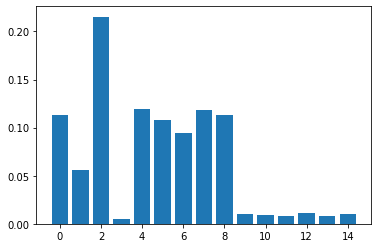

In [90]:
plt.bar([x for x in range(len(rf_feat))], rf_feat)

### Seleção

In [91]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [92]:
chi = SelectKBest(score_func=chi2, k=10)
chi.fit(x_train, y_train)

chi_cols = chi.get_support(indices=True)
chi_cols

array([ 0,  1,  2,  4,  5,  6,  7,  8, 12, 14])

In [93]:
fx_treino = chi.transform(x_treino)
fx_teste = chi.transform(x_teste)

filt_rf = RandomForestClassifier()
filt_rf.fit(fx_treino, y_treino)

f_pred = filt_rf.predict(fx_teste)

round(accuracy_score(y_teste,f_pred)*100,2)

78.12

É possível avaliar que houve uma melhora percentual de aproximadamente 1.116 entre os modelos treinados antes e depois do filtro de caracteríticas.

### Método Filter

In [94]:
rf_filt = filt_rf.feature_importances_

print("Socores: ")
for i,j in enumerate(rf_filt):
  if j != 0:
    print('  %s: %f' % (test.columns[i], j) )

Socores: 
  CryoSleep: 0.140660
  Cabin: 0.048815
  Age: 0.188082
  VIP: 0.122656
  RoomService: 0.122336
  FoodCourt: 0.096024
  ShoppingMall: 0.136418
  Spa: 0.116473
  VRDeck: 0.015270
  Earth: 0.013266


<BarContainer object of 10 artists>

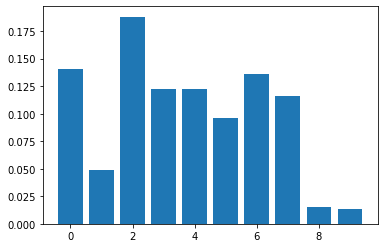

In [95]:
plt.bar([x for x in range(len(rf_filt))], rf_filt)

### Avaliação das seleções de características

As colunas avaliadas no método wrapper são todas do conjunto de dados, e a seleção utilizando filtro removeu 4 colunas, sendo:

In [96]:
wrap = train.columns
filt = wrap[chi_cols]

print(f"total de colunas: {list(wrap)}\ncolunas filtradas: {list(set(wrap) - set(filt))}\n")
print("Total de colunas utilizadas após filtro:\n  ", list(filt))

total de colunas: ['CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Earth', 'Europa', 'Mars', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']
colunas filtradas: ['Transported', 'Europa', 'TRAPPIST-1e', 'VIP', 'Earth', '55 Cancri e']

Total de colunas utilizadas após filtro:
   ['CryoSleep', 'Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Mars', 'PSO J318.5-22']


# Visualização



### Exploração dos dados
Para checar qual tipo de método de paronização dos dados utilizar, serão verificadas as distribuições das variáveis

In [97]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

In [98]:
age = px.histogram(train, x="Age")
age.show()

# distribuição não gaussiana

In [99]:
gastos = make_subplots(rows = 2, cols = 2)
gastos.add_trace(go.Scatter(y=train["FoodCourt"]), row=1, col=1)
gastos.add_trace(go.Scatter(y=train["RoomService"]), row=1, col=2)
gastos.add_trace(go.Scatter(y=train["ShoppingMall"]), row=2, col=1)
gastos.add_trace(go.Scatter(y=train["Spa"]), row=2, col=2)
gastos.show()

É possível observar que a maior parte dos valores gastos, em geral, permaneceu próxima de valores mais baixos, embora tenham ocorrido variações muito altas que caracterizaram alto desvio padrão e média

### Métricas

In [100]:
rf.fit(x_treino, y_treino)

rf_predm = rf.predict(x_teste)
print("acuracidade: ", round(accuracy_score(y_teste, rf_predm)*100, 2))
print("Precisão:    ", round(precision_score(y_teste, rf_predm)*100, 2))
print("F1:          ", round(f1_score(y_teste, rf_predm)*100, 2))

acuracidade:  76.8
Precisão:     78.74
F1:           76.83


In [101]:
Knn.fit(x_treino, y_treino)

knn_predm = Knn.predict(x_teste)
print("acuracidade: ", round(accuracy_score(y_teste, knn_predm)*100, 2))
print("Precisão:    ", round(precision_score(y_teste, knn_predm)*100, 2))
print("F1:          ", round(f1_score(y_teste, knn_predm)*100, 2))

acuracidade:  77.28
Precisão:     76.6
F1:           78.34


In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

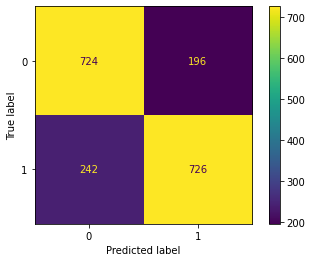

In [103]:
rf_confusion = confusion_matrix(y_teste, rf_predm)
ConfusionMatrixDisplay(rf_confusion).plot()

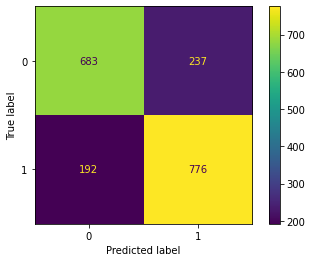

In [104]:
knn_confusion = confusion_matrix(y_teste, knn_predm)
ConfusionMatrixDisplay(knn_confusion).plot()

In [105]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [106]:
neutro = [0 for _ in range(len(y_teste))] 
n_auc = roc_auc_score(y_teste, neutro)

In [107]:
rf_prob = rf.predict_proba(x_teste)
rf_prob = rf_prob[:,1]
rf_auc = roc_auc_score(y_teste, rf_prob)

In [108]:
knn_prob = Knn.predict_proba(x_teste)
knn_prob = knn_prob[:,1]
knn_auc = roc_auc_score(y_teste, knn_prob)

In [109]:
n_fp, n_tp, n_thresh = roc_curve(y_teste, neutro)
rf_fp, rf_tp, rf_thresh = roc_curve(y_teste, rf_prob)
knn_fp, knn_tp, knn_thresh = roc_curve(y_teste, knn_prob)

# print("Limiares: ")
# print(f"random forest: {rf_thresh}\nKNN: {knn_thresh}")

In [110]:
print("Áreas abaixo das curvas:")
print("  Random forest: ", rf_auc)
print("  KNN:           ", knn_auc)

Áreas abaixo das curvas:
  Random forest:  0.8337894134028027
  KNN:            0.8260499011857707


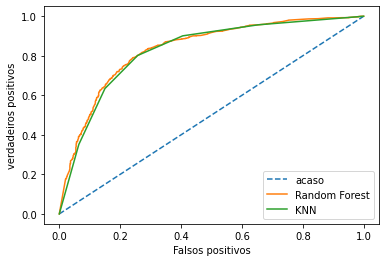

In [111]:
plt.plot(n_fp, n_tp, linestyle='--', label="acaso")
plt.plot(rf_fp, rf_tp, label="Random Forest")
plt.plot(knn_fp, knn_tp, label="KNN")

plt.xlabel("Falsos positivos")
plt.ylabel("verdadeiros positivos")
plt.legend(loc=4)

plt.show()